# Import the packages

In [1]:
import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 16]  # width, height
plt.rcParams['xtick.direction'] = 'out'

ModuleNotFoundError: No module named 'matplotlib'

# Loading and Visualizing the Toy Data

In [1]:
df= pd.read_csv('WH90_17.csv')
df=df[['2017','2016','2015','2014']]
df.head()

NameError: name 'pd' is not defined

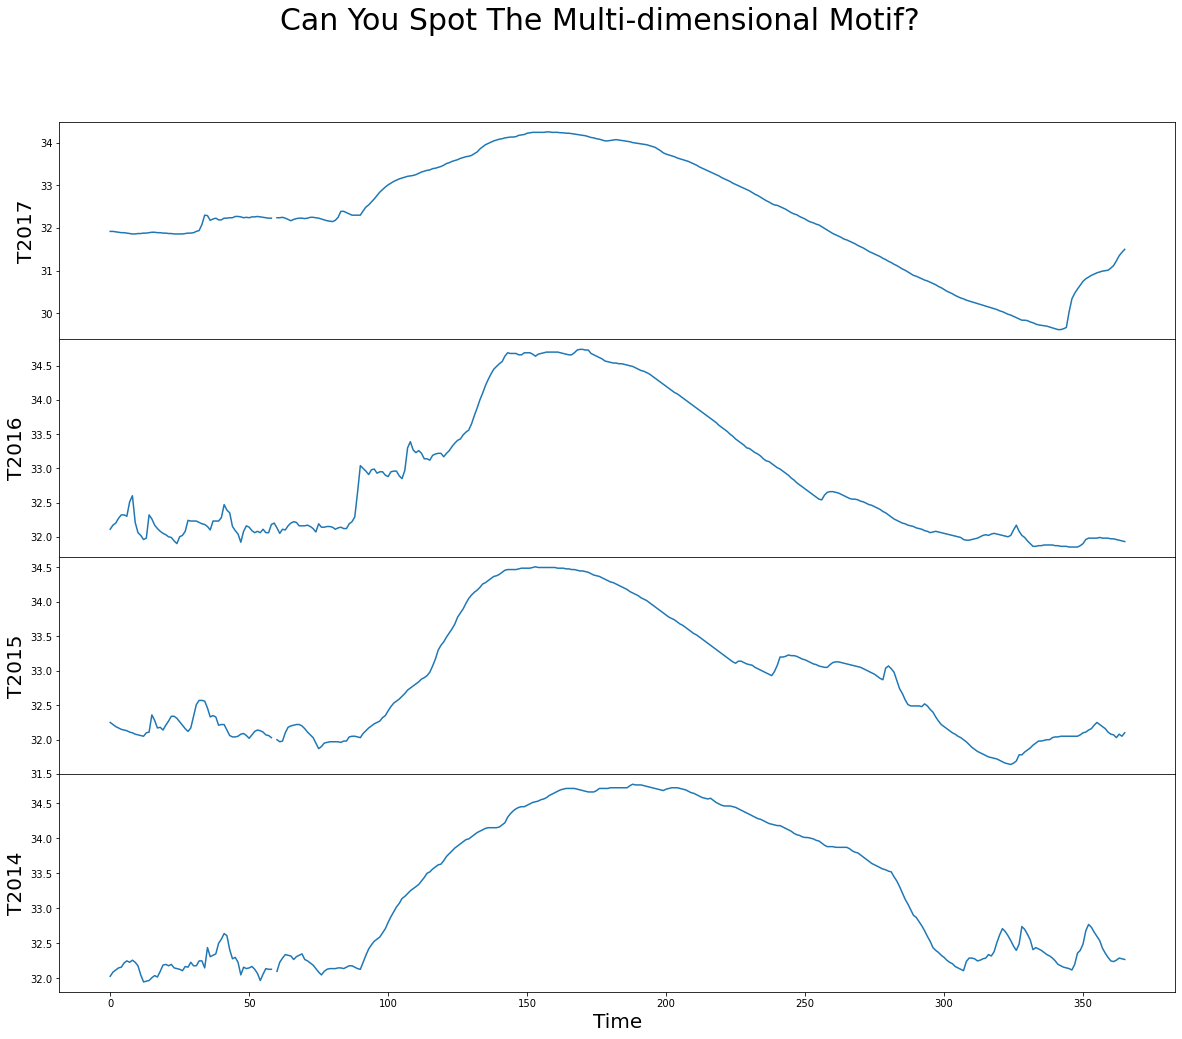

In [12]:
fig, axs = plt.subplots(df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')
j=0
for i in df.columns:
    axs[j].set_ylabel(f'T{i}', fontsize='20')
    axs[j].set_xlabel('Time', fontsize ='20')
    axs[j].plot(df[i])
    j=j+1
plt.show()

# 1-Dimensional Exploration

In [13]:
m = 30
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in df.columns:
    mps[dim_name] = stumpy.stump(df[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")

The motif pair matrix profile value in 2017 is 0.1
The motif pair matrix profile value in 2016 is 0.1
The motif pair matrix profile value in 2015 is 0.2
The motif pair matrix profile value in 2014 is 0.3


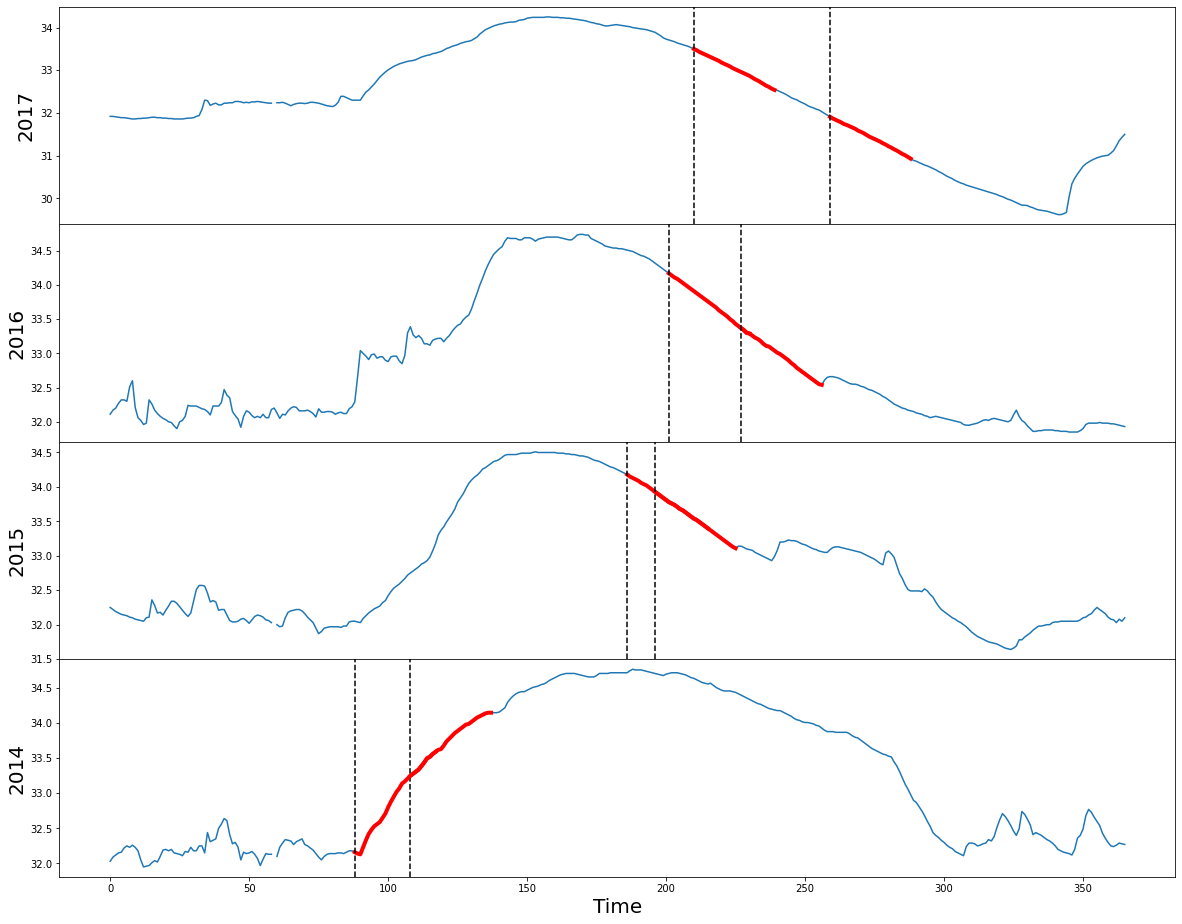

In [14]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})
i=0
for j, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='20')
    axs[i].plot(df[dim_name])
    axs[i].set_xlabel('Time', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(df[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')
    i=i+1    
plt.show()

# Multi-dimensional Matrix Profiles

In [15]:
mps, indices = stumpy.mstump(df, m)

In [16]:
motifs_idx = np.argsort(mps, axis=1)[:, :2]

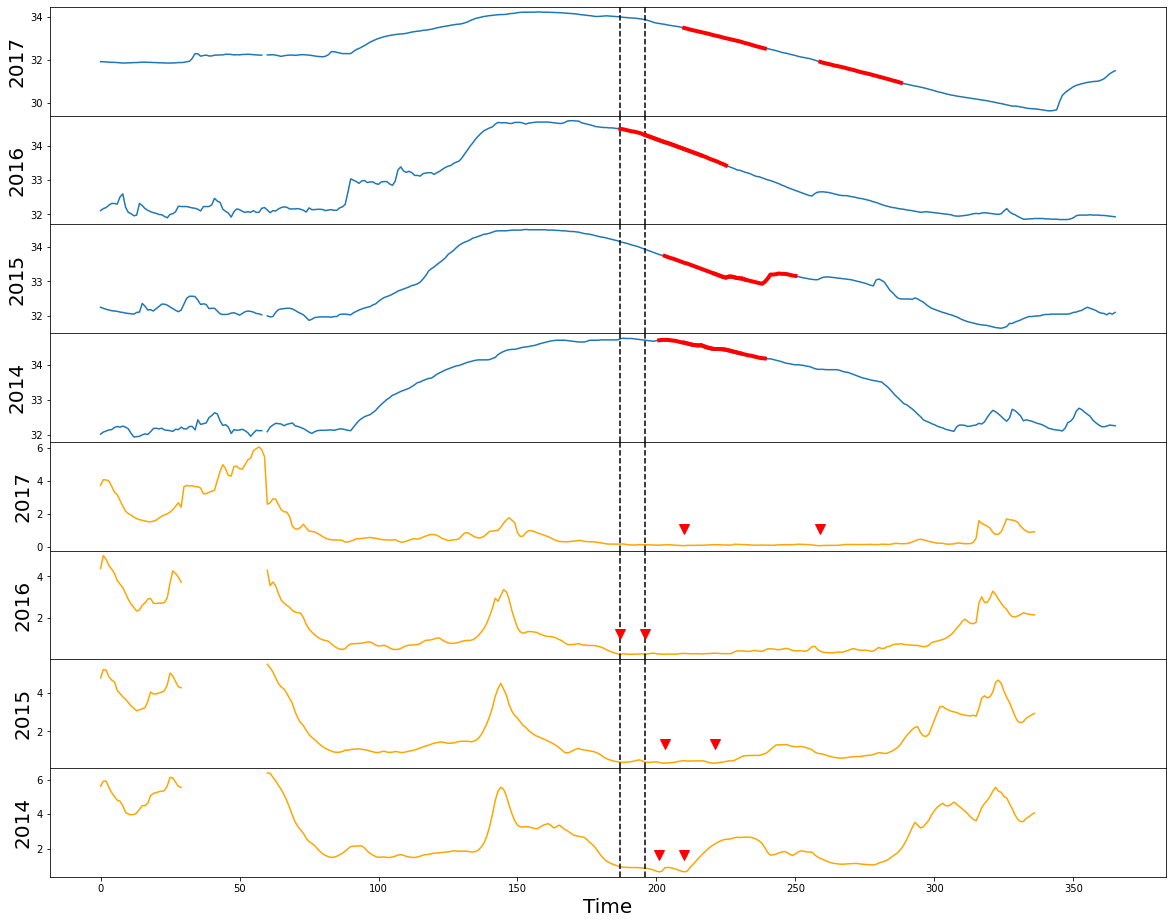

In [23]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})
k=0
for i, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')
    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')
    axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    #if dim_name != '2016':
    axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), df[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
    axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), df[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)
    axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='red')
    axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='red')

    k=k+1
plt.show()

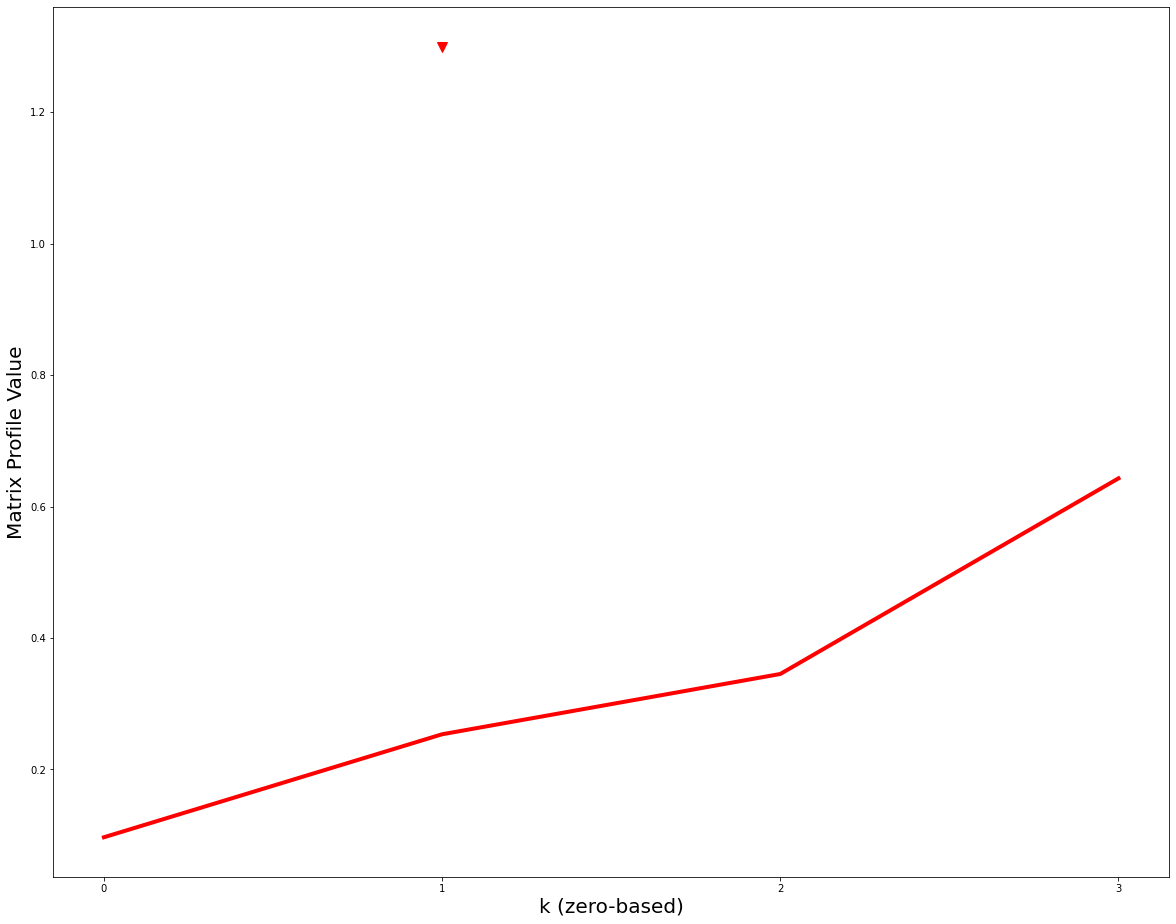

In [24]:
plt.plot(mps[range(mps.shape[0]), motifs_idx[:, 0]], c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Matrix Profile Value', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(1, 1.3, marker="v", markersize=10, color='red')
plt.show()

In [19]:
k = 1
S = stumpy.subspace(df, m, motifs_idx[k][0], indices[k][motifs_idx[k][0]], k)
print(f"For k = {k}, the {k + 1}-dimensional subspace includes subsequences from {df.columns[S].values}")


For k = 1, the 2-dimensional subspace includes subsequences from ['2015' '2016']
